# Data Science in Finance

## Lousy models are great!

We often hear that in the world of hedge funds and seeking alpha (a term we'll go over in a bit), extremely poor models are used and hailed as great achievements. A model with an $R^2$ of 0.1 is great! A model with an $R^2$ of 0.3 is unheard of.

Is it because the data scientists working in the field are not as good as the Physicists working at the LHC, or the engineers working on Google's search prediction algorithms?

#### The answer might surprise you!

# Hungry for coin flips?

Let's imagine that you happen to have some inside source at the mint who told you that a common quarter is actually not a fair coin. This information is only known to you and your friend. Let's pretend like the probability of getting "heads" is actually 0.55. So not anything you'd expect to notice on a short scale, but enough to where if you bet on coin flips enough, you might actually be able to make lots of money.

Would you bet on those coin flips? Would you consider yourself very lucky for having such privileged information?

### What's your $R^2$?

### Our model:

$$
\begin{align*}
Y =& \begin{cases}
1 & \text{ if "heads"} \\
0 & \text{ if "tails"}
\end{cases} \\
P(Y=1) =& w \\
\hat Y \equiv& 1
\end{align*}
$$

First we need to figure out what our model is! It's not entirely clear that we're using a predictive model, but we are. Our model happens to be very simple: always pick "heads".

Formally, we define a random variable $Y$ such that $Y=0$ if the coin flip results in "tails" and $Y=1$ if the coin flip results in "heads". Our model is very simple: it takes no input data (so no features), and always returns 1.

So let's calculate our $R^2$ value. To do this, we should first calculate SSE and SST. Let $w$ be the probability of getting "heads" (just for generality). In our particular case, $w=0.55$.

Note that the mean we use for this the commonly excepted mean (not the mean your model predicts)!

$$
\begin{align*}
\text{SSE} =& \sum\limits_{i=0}^{n-1}\left(y_i - \hat y_i\right)^2 & \text{SST} =& \sum\limits_{i=0}^{n-1}\left(y_i - \bar y\right)^2 \\
=& \sum\limits_{i=0}^{n-1}\left(y_i - 1\right)^2 & =& \sum\limits_{i=0}^{n-1}\left(y_i - 0.5\right)^2 \\
=& \sum\limits_{i=0}^{n-1}\left(y_i^2 -2y_i + 1^2\right) & =& \sum\limits_{i=0}^{n-1}\left(y_i^2 - 2(0.5)y_i + 0.5^2\right) \\
=& \sum\limits_{i=0}^{n-1}\left(-y_i + 1\right) & =& \sum\limits_{i=0}^{n-1}\left(0.25\right) \\
=& -nw + n & =& 0.5n \\
=& n(1-w) & =& 0.5n \\
\end{align*}
$$

So, our $R^2$ is:

$$
\begin{align*}
R^2 =& 1 - \frac{\text{SSE}}{\text{SST}} \\
=& 1 - \frac{n(1-w)}{0.5n} \\
=& 2w - 1 = 1.1 - 1 = 0.1
\end{align*}
$$

So we can see that one reason models with such low predictive power succeed so well in finance: it's trade-off between quality and quantity. It's also true that financial data is extremely noisy and there is very little stationarity due to an ever changing landscape of laws and company leaderships, etc.

### Not necessarily bad Data Scientists

### So what are the bets we're making?

# Not just making money

Finding which stocks will go up is pretty much a solved problem. Most "secure" stocks will rise in price on a long enough time-line. But just because the total price of stocks in your account has risen doesn't mean the value has risen. You have to account for the value of money (which is constantly dropping -- inflation).

To illustrate this: we could make money by investing in General Electric in 2010 and holding our stock.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import DataReader

reader = DataReader(["AAPL", "SPY", "GOOG", "GE"], data_source="yahoo")

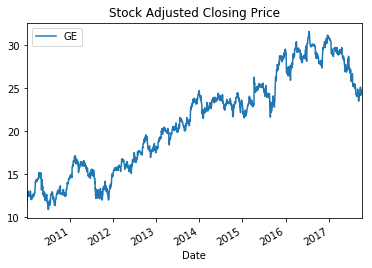

In [4]:
fig = plt.figure()
ax = reader["Adj Close", :, "GE"].plot(label="GE")
ax.legend()
ax.set_title("Stock Adjusted Closing Price")
plt.savefig("img/close_price_GE.png")

In [28]:
tmp = reader["Adj Close", :, "GE"]
a,b = tmp.iloc[0], tmp.iloc[-1]
print(a,b)

c = (a - b) / b
print(c)

print((1+c)**(1.0/11) - 1)

24.389999 11.955239
1.04010969584
0.0669653602488


![](img/close_price_GE.png)

If we'd done that, we would have seen on average about 6% return per year! That's over the average inflation of somewhere between 3-5 percent, so we're looking pretty good, right?

# Looking good?

Well, yes and no. On the one hand, we did make money (at the expense of some risk, of course). But what if we'd chosen a better company to invest in like Apple? Or what if we'd invested instead in an index fund like Spyder?

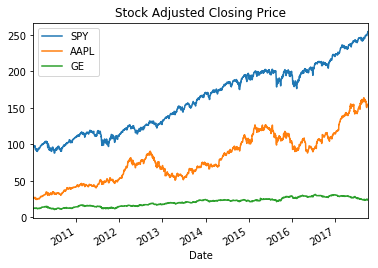

In [3]:
fig = plt.figure()
ax = reader["Adj Close", :, "SPY"].plot(label="SPY")
ax = reader["Adj Close", :, "AAPL"].plot(label="AAPL", ax=ax)
ax = reader["Adj Close", :, "GE"].plot(label="GE", ax=ax)
ax.legend()
ax.set_title("Stock Adjusted Closing Price")
plt.savefig("img/close_price_3.png")

![](img/close_price_3.png)

# Better yet!

We can continue this thought process ad infinitum. For instance, we could've invested in Google. Or done something even crazier (a plot I won't show for simplicity reasons) -- volatility trading.

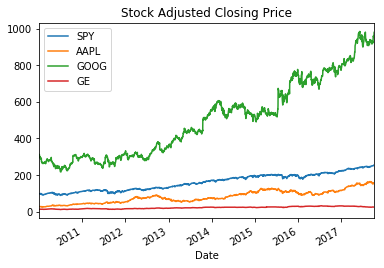

In [2]:
fig = plt.figure()
ax = reader["Adj Close", :, "SPY"].plot(label="SPY")
ax = reader["Adj Close", :, "AAPL"].plot(label="AAPL", ax=ax)
ax = reader["Adj Close", :, "GOOG"].plot(label="GOOG", ax=ax)
ax = reader["Adj Close", :, "GE"].plot(label="GE", ax=ax)
ax.legend()
ax.set_title("Stock Adjusted Closing Price")
plt.savefig("img/close_price_all_4.png")

![](img/close_price_all_4.png)

# So what's the game?

# Active Portfolio Management
Richard C. Grinold, Ronald N. Kahn

# The CAPM

## The Capital Asset Pricing Model

$$ r_i = \alpha_i + \beta_i r_m $$

$$ E[\alpha_i] = 0 $$

$$ r_p = \alpha_p + \beta_p r_m $$

Roughly speaking, this is the $\alpha$ we've all heard so much about. One problem is that a linear model is not the best model for predicting stock returns.

# The Hedge Fund Mission

## Make money

### Like Roulette

![](img/americanroulette.png "hey")

## A paraphrasing

# Risk

## What is it?

### Variance?

# Exceptional Returns